# Segmentation of Solar Corona Images from Solar Dynamic Observatory (SDO) <br>
Francesco Carella and George Miloshevich 
<div style="text-align: center;">
   <img src="fnf.jpg" alt="Drawing" style="width: 400px;" />
</div>

In [3]:
colab = False

**Intro**

In [4]:
if colab:
    !pip install -r requirements.txt

Now, let's import some useful libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## 1) Plot the data <br>
### Full Disk Images <br>
In this section we plot the original data of the Sun in different wavelenghts from the Solar Dynamic Observatory (`SDO`). <br> 
The Solar Dynamics Observatory (SDO) uses two key instruments for its measurements: the Atmospheric Imaging Assembly (`AIA`) and the Helioseismic and Magnetic Imager (`HMI`).

* AIA captures detailed images of the Sun in `multiple wavelengths`, revealing structures like sunspots, solar flares, and the solar corona. It provides critical data on the Sun's outer layers and dynamic events.

* HMI measures the Sun's `magnetic fields` and surface motion, offering insights into solar activity and its underlying magnetic processes. <br>

Together, AIA and HMI provide a comprehensive view of solar phenomena, enhancing our understanding of the Sun's behavior and its impact on space weather.

### Different "Looks" of the Sun <--> Different Wavelenghts <br>
The Sun dresses up differently depending on which wavelengths you are observing it. In this section we plot real data from the Solar Dynamic Observatory.<br>
Here is an example on how to plot an image. In particular, you are looking at the `193 A` wavelength. 

/tmp/ipykernel_5004/3668719161.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sdo_193), cmap=cm_193)
/tmp/ipykernel_5004/3668719161.py:9: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(sdo_193), cmap=cm_193)


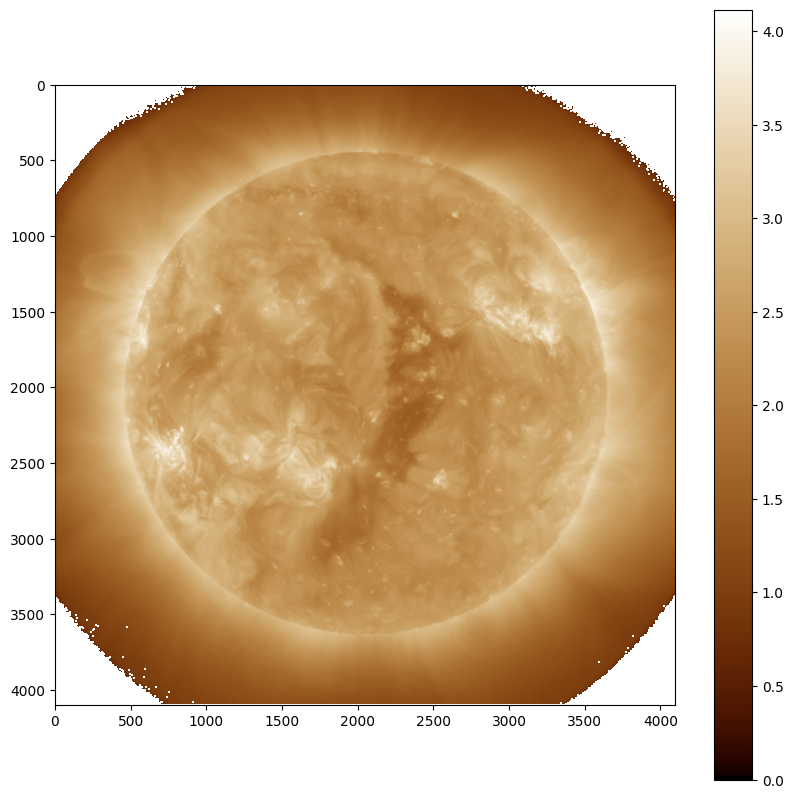

In [5]:
# 1) Load the colormap
cm_193 = pickle.load(open('./sdo_colormaps/aia193_colormap.pkl', 'rb')) #each channel has its own colormap in the sdocolormaps folder you have all of them

# 2) Load the data (Here you have 193 A channel from SDO)
sdo_193 = np.load('./data/2012_05_07T12_00_07_84_193.npy')

# 3) Plot the image
plt.figure(figsize=(10,10))
plt.imshow(np.log10(sdo_193), cmap=cm_193)
plt.colorbar()
plt.show()


Here we have used np.log10 to enhance the contrast of the image. Try to remove it and see the difference. Try also to use a different function to enhance the contrast of the image, such as np.sqrt, np.log, np.log2, etc.

In [ ]:
# your turn :)

Now, plot all the different wavelenghts. What are the differences? Can you see different structures? If so, why?

In [ ]:
# your turn :)

Now, let's plot the HMI Magnetogram. Which are the differences with the previous wavelenghts? What is enlightened the most?

In [ ]:
cm = 'gray'

# your turn :)

### Transformed Images <br>
Here we plot the tranformed images. What are the differences with respect to the original ones? 

In [ ]:
transformed_data = np.load('./data/2012_05_07T12_00_07_84.npy')
plt.figure(figsize=(10,10))
plt.imshow(np.log10(transformed_data[0]), cmap=cm_193)
plt.colorbar()
plt.show()

### Transformed Images: Plot different wavelenghts <br>
As you have done before, plot all the different wavelenghts and magnetogram. 

In [ ]:
# your turn :)

## 2) Data Preparation (Pre-Processing) <br>
### Scaling
Machine Learning tools are sensitive to the scale of the input features. You may end up having some features that are predominant just because, for example, are orders of magnitude bigger than others. Scaling of a dataset is a common requirement for many machine learning estimators. By scaling one mean that all the data are somehow normalized such that there is no predominant feature. The easiest thing to do, for example, can be just dividing all your values by the maximum value that you have in your image.<br>
Here, we will use a Standard Scaler.

### Standard Scaler
The `StandardScaler` is a feature scaling technique provided by the `sklearn.preprocessing` module in Python. It standardizes features by removing the mean and scaling to unit variance. This process results in a distribution with a mean of 0 and a standard deviation of 1 for each feature, which is a common requirement for many machine learning algorithms.

Mathematically, it transforms the data using the formula:

$ z = \frac{x - \mu}{\sigma} $

where:
- $ x $ is the original feature value,
- $ \mu $ is the mean of the feature,
- $ \sigma $ is the standard deviation of the feature.

### When to Use Standard Scaler

- When you have features with different units or scales.
- When your machine learning algorithm assumes normally distributed data.
- To improve the performance and training stability of many algorithms, including linear regression, logistic regression, and neural networks.

### Example Usage

```python
from sklearn.preprocessing import StandardScaler

# Sample data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

Data has to be flattened before giving it to the model (K-Means) and before scaling. Here's how to do it:

In [ ]:
flat94 = transformed_data[0].flatten()
flat171 = transformed_data[1].flatten()
flat193 = transformed_data[2].flatten()
flat211 = transformed_data[3].flatten()
flat304 = transformed_data[4].flatten()
flathmi = transformed_data[5].flatten()

data = np.stack((flat94, flat171, flat193, flat211, flat304, flathmi), axis=1)

Given the data and the example above. Try to scale the data yourself :)

In [ ]:
from sklearn.preprocessing import StandardScaler

## 3) Segmentation with K-Means <br>
K-means segmentation is a method used to partition an image into clusters based on pixel similarity. By selecting a predefined number of clusters (k), the algorithm assigns each pixel to the nearest cluster center. This process iterates until the cluster centers stabilize. K-means segmentation simplifies images by grouping similar pixels together, making it easier to identify and analyze different regions. It is widely used in image processing for tasks such as object detection, pattern recognition, and image compression. <br>

<div style="text-align: center;">
  Or, more simple: <br>
  <img src="machine-learning.jpg" alt="Drawing" style="width: 400px;" />
</div>

In [ ]:
from sklearn.cluster import KMeans

#Select the number of clusters
nc = 3

#Run K-Means
km = KMeans(n_clusters=nc, random_state=42).fit(data).predict(data)
labels = km.labels_ #these are the labels of the clusters

#Plot the clustered image
plt.figure(figsize=(10,10))
plt.imshow(labels.reshape(sdo_193.shape), cmap='tab20')


Now, try yourself with several different number of clusters. What is the best one?

In [ ]:
"""
Have fun with the Sun!
   _____  
  /     \ 
 | o   < |
 |   ^   |
 | \___/ |
  \_____/
  
"""

In [ ]:
# your turn :)